<a href="https://colab.research.google.com/github/NMKUNT/MohanKrishna_INFO5502_Spring2022/blob/main/lab_assignment_06_with_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (03/24/2022, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Task Decription 

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [158]:
### You code here:


import pandas as pd
import numpy as np
import csv as csv
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline


from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error



In [174]:
# loading Train dataset
mntraindataset = pd.read_csv('/content/train_luc.csv', header=0)
print(" count of samples : ",mntraindataset.shape[0] ,"count of features : ",mntraindataset.shape[1],"\n")
mntraindataset.head()

 count of samples :  9174 count of features :  12 



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [160]:
# read about the data elsewhere, however, it is critical to observe the data to make sure
# everything is read in correctly and matches the description

mntraindataset.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,190.581753
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,181.011530
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,144.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,282.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


In [161]:

datetotime=pd.to_datetime(mntraindataset['datetime']) # storing the date information in a variable in datetime format.

#I am extracting the hour, day number of the week, month and year.

mntraindataset['Hour'] = datetotime.dt.strftime('%-H')
mntraindataset['Dayofweek']=datetotime.dt.dayofweek
mntraindataset['Month'] = datetotime.dt.strftime('%m')
mntraindataset['Year'] = datetotime.dt.strftime('%Y')




In [162]:
mntraindataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Dayofweek,Month,Year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,01,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,01,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,01,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,01,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,01,2011


weather number : [1 2 3 4]


Text(0.5, 1.0, 'Measured bike use over 2 years')

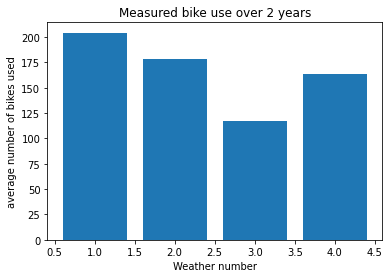

In [143]:
#  average number bikes used in particular weather

weather = np.unique(mntraindataset['weather'])
print("weather number :",weather)

weather_mean = {}
for mn in weather:
    temp_df = mntraindataset.loc[mntraindataset['weather'] == mn]
    weather_mean[mn] = temp_df['count'].mean()


plt.bar(weather,[weather_mean[mn] for mn in weather])
plt.xlabel("Weather number")
plt.ylabel("average number of bikes used")
plt.title("Measured bike use over 2 years")

Day number of the week: [0 1 2 3 4 5 6]


Text(0.5, 1.0, 'Measured bike use over 2 years')

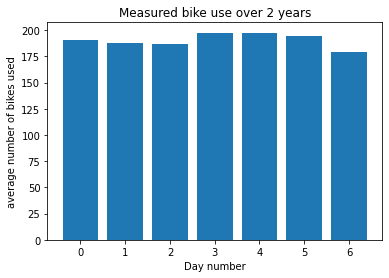

In [144]:
#  average number bikes used on particular day of a week
daynumberofweek = np.unique(mntraindataset['Dayofweek'])
print("Day number of the week:",daynumberofweek)

daynumberofweek_mean = {}
for mn in daynumberofweek:
    temp_df = mntraindataset.loc[mntraindataset['Dayofweek'] == mn]
    daynumberofweek_mean[mn] = temp_df['count'].mean()


plt.bar(daynumberofweek,[daynumberofweek_mean[mn] for mn in daynumberofweek])
plt.xlabel("Day number")
plt.ylabel("average number of bikes used")
plt.title("Measured bike use over 2 years")

Month :  ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']


Text(0.5, 1.0, 'Measured bike use over 2 years')

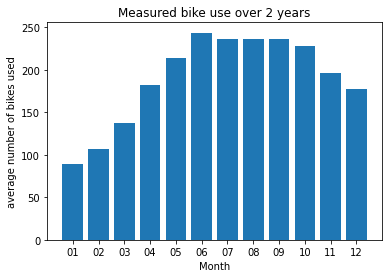

In [145]:
#  average number bikes used in different months
month = np.unique(mntraindataset['Month'])
print("Month : ",month)

month_mean = {}
for mn in month:
    temp_df = mntraindataset.loc[mntraindataset['Month'] == mn]
    month_mean[mn] = temp_df['count'].mean()


plt.bar(month,[month_mean[mn] for mn in month])
plt.xlabel("Month")
plt.ylabel("average number of bikes used")
plt.title("Measured bike use over 2 years")

In [146]:
from sklearn.datasets import load_boston
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
cols = ['weather','Dayofweek','Hour','windspeed','atemp','humidity'] 

X = mntraindataset[cols]

y = mntraindataset['count'].values
mntraindataset = mntraindataset.drop(['datetime'], axis=1)
train_mn_x,test_mn_x,train_mn_y,test_mn_y = train_test_split(mntraindataset,y, test_size = 0.3, random_state = 99)
print("train x : ",train_mn_x.shape)
print("test x : ",test_mn_x.shape)
print("train y : ",train_mn_y.shape)
print("test y : ",test_mn_y.shape)
train_mn_x

train x :  (6421, 15)
test x :  (2753, 15)
train y :  (6421,)
test y :  (2753,)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Dayofweek,Month,Year
5171,1,0,1,2,11.48,15.150,61,6.0032,2,11,13,1,4,02,2012
670,1,0,0,1,16.40,20.455,32,19.9995,17,78,95,18,6,02,2011
749,1,0,1,1,9.02,10.605,69,19.0012,0,2,2,3,1,03,2011
2450,3,0,1,2,30.34,34.850,70,23.9994,30,108,138,10,4,07,2011
8788,4,0,1,1,13.12,15.150,53,16.9979,23,139,162,22,4,11,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5188,1,0,1,3,12.30,15.150,61,8.9981,14,345,359,18,4,02,2012
7890,3,0,1,1,26.24,31.060,33,6.0032,60,187,247,11,1,09,2012
1768,2,0,1,2,18.86,22.725,88,15.0013,5,39,44,0,3,05,2011
3240,3,0,1,2,25.42,25.760,100,0.0000,2,27,29,10,4,09,2011


took reference of the code from the below website for randomsearchcv

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [147]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()


mnparams = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

bestparameter = RandomizedSearchCV(estimator = model, param_distributions = mnparams, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
bestparameter.fit(train_mn_x,train_mn_y)
bestparameter.best_params_

Fitting 2 folds for each of 100 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1800}

In [151]:
#model = DecisionTreeRegressor()
#model = LinearRegression()
#model = KNeighborsRegressor(n_neighbors = 5)
#model = svm.LinearSVR()
model = RandomForestRegressor(bootstrap = True,
 max_depth = 10,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators = 1800)

print("Columns given as input to train the algorithm are : ",cols)
print(model) # Used model information 

Columns given as input to train the algorithm are :  ['weather', 'Dayofweek', 'Hour', 'windspeed', 'atemp', 'humidity']
RandomForestRegressor(max_depth=10, n_estimators=1800)


RMS error: 75.03901969246137


<function matplotlib.pyplot.show>

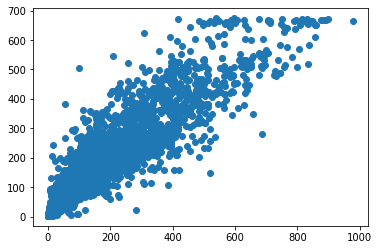

In [166]:
# plotting predicted count vs actual count  
model.fit(train_mn_x[cols], train_mn_x['count'])

pred_count = model.predict(test_mn_x[cols])

rms_error = np.sqrt(mean_squared_error(test_mn_x['count'],pred_count))
print("RMS error:",rms_error)
plt.scatter(test_mn_y,pred_count)
plt.show

RMS error: 20.383629076539854


<function matplotlib.pyplot.show>

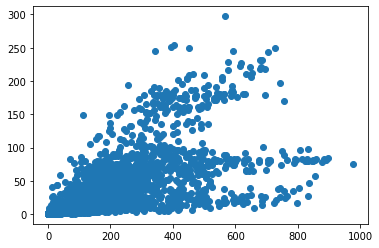

In [167]:
# plotting predicted casual vs actual casual 
model.fit(train_mn_x[cols], train_mn_x['casual'])

pred_casual = model.predict(test_mn_x[cols])

rms_error = np.sqrt(mean_squared_error(test_mn_x['casual'],pred_casual))
print("RMS error:",rms_error)
plt.scatter(test_mn_y,pred_casual)
plt.show

RMS error: 65.00709194277482


<function matplotlib.pyplot.show>

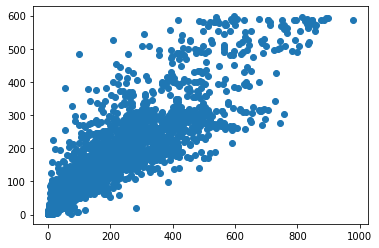

In [168]:
# plotting predicted registered vs actual registered 
model.fit(train_mn_x[cols], train_mn_x['registered'])

pred_registered = model.predict(test_mn_x[cols])

rms_error = np.sqrt(mean_squared_error(test_mn_x['registered'],pred_registered))
print("RMS error:",rms_error)
plt.scatter(test_mn_y,pred_registered)
plt.show

In [172]:
main_test = pd.read_csv('/content/test_luc.csv')
print(" count of samples : ",main_test.shape[0] ,"count of features : ",main_test.shape[1],"\n")

# adding the columns to test dataset, which we have added to train dataset 
datetotime1=pd.to_datetime(main_test['datetime'])
main_test['Hour'] = datetotime1.dt.strftime('%-H')
main_test['Dayofweek']=datetotime1.dt.dayofweek
main_test['Month'] = datetotime1.dt.strftime('%m')


# fitting the model for count, casual and registered
model.fit( mntraindataset[cols], mntraindataset['count'])
predicted_count = model.predict(main_test[cols])
model.fit( mntraindataset[cols], mntraindataset['casual'])
predicted_casual = model.predict(main_test[cols])
model.fit( mntraindataset[cols], mntraindataset['registered'])
predicted_registered = model.predict(main_test[cols])


main_test['count'] = predicted_count
main_test['casual'] = predicted_casual
main_test['registered'] = predicted_registered
main_test['sum'] = predicted_casual+predicted_registered # sum of casual and registered 

sample_data = pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/sample_prediction.csv', sep=",")


print("RMS error : ",np.sqrt(mean_squared_error(sample_data['count'],predicted_casual+predicted_registered)))
print("RMS error : ",np.sqrt(mean_squared_error(sample_data['count'],predicted_count)))

# saving the output to CSV 
with_separate_counts = main_test[['datetime','count','casual','registered','sum']].to_csv('with_separate_counts.csv',    index=False, header=True)

final_output = main_test[['datetime','count']].to_csv('final_output.csv',    index=False, header=True)

 count of samples :  1712 count of features :  9 

RMS error :  98.23671959747139
RMS error :  97.40665365172141
